___
# GradientBoostingRegressor


reference:
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
- https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae
___

## Import Libraries

In [1]:
## remove this, this is for my personal pc setup
import sys; import os; sys.path.append(os.path.expanduser('~/DropBox/my/projects/T/'))

In [2]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import pandas   as pd
import operator as op

import numpy             as np
import seaborn           as sns
from datetime import datetime

import pyscope
from pyscope import read_ss

from IPython.display import IFrame

from T import * # want T to be accessible


%load_ext autoreload
%autoreload

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

## Data

Setting up test data to look at

In [3]:
a = T(np.random.normal(0, size=(1000,1)), columns=["values"])
a['label'] = 1
b = T(np.random.normal(5, size=(1000,1)), columns=["values"])
b['label'] = 0

data = pd.concat([a, b])

X = data.drop(columns="label")
y = T(data).select("label")
display(X.head(), y.head())

,values
0,-1.009037
1,0.986944
2,-0.778452
3,0.136648
4,-1.081403


,label
0,1
1,1
2,1
3,1
4,1


## EDA

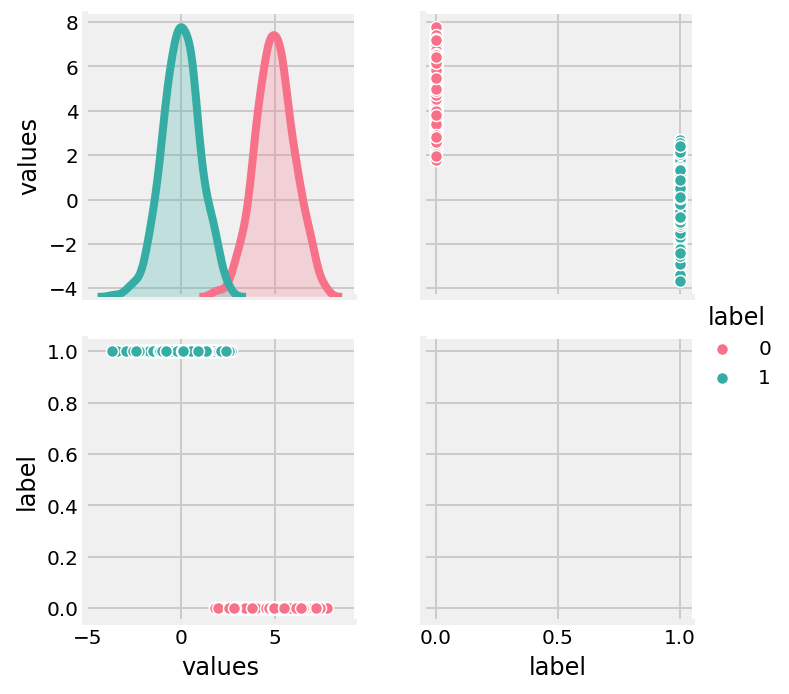

In [4]:
sns.pairplot(data,hue="label",palette="husl")

## Split Train & Test 

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y 
                                                    , test_size=0.30 
                                                    , random_state=101)

In [7]:
# try with and without

#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [8]:
#X_train

## Training

In [9]:
from sklearn.ensemble import GradientBoostingRegressor

In [10]:
model = GradientBoostingRegressor(max_depth=5, n_estimators=5, learning_rate=1.0)
model.fit(X_train, y_train.values.ravel())

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=5, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

## Evaluation

In [11]:
#One of the benefits of growing trees is that we can understand how important each of the features are print "Feature Importances" 

coeff_df = pd.DataFrame(model.feature_importances_ ,X.columns,columns=['Coefficient'])
T(coeff_df).sort("Coefficient", ascending=False)

,Coefficient
values,1.0


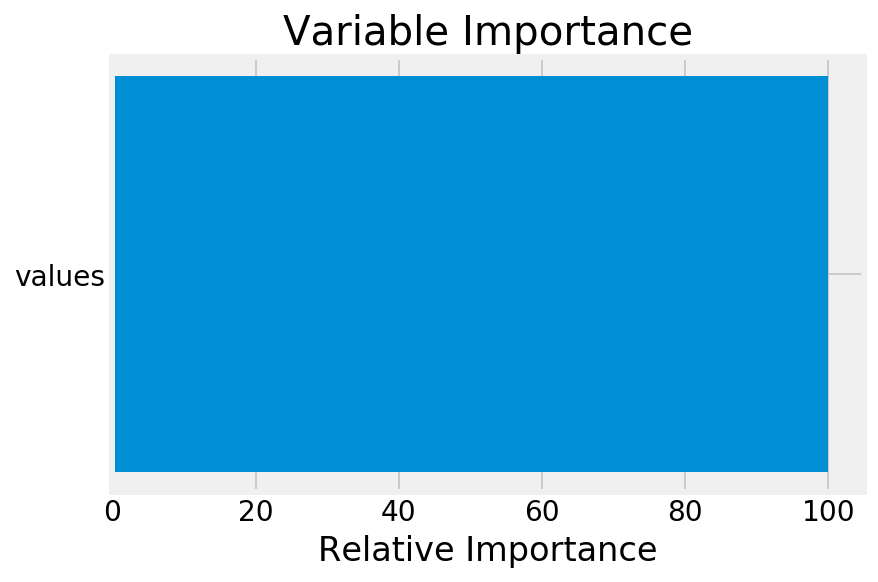

In [12]:
# #############################################################################
# Plot feature importance
feature_importance = model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
#plt.subplot(1, 2, 2)
plt.rcParams['font.size'] = 14
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [13]:
predictions = model.predict(X_test)

In [14]:
import copy 
predictions_original = copy.deepcopy(predictions)

#convert into binary values
for i in range(0,predictions.size):
    if predictions[i]>=.5:       # setting threshold to .5
       predictions[i]=1
    else:  
       predictions[i]=0
predictions

array([0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 1.

In [15]:
y_test.head(n=3)

,label
1458,0
198,1
1276,0


In [16]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
confm = confusion_matrix(y_test, predictions)
confm

array([[310,   1],
       [  3, 286]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

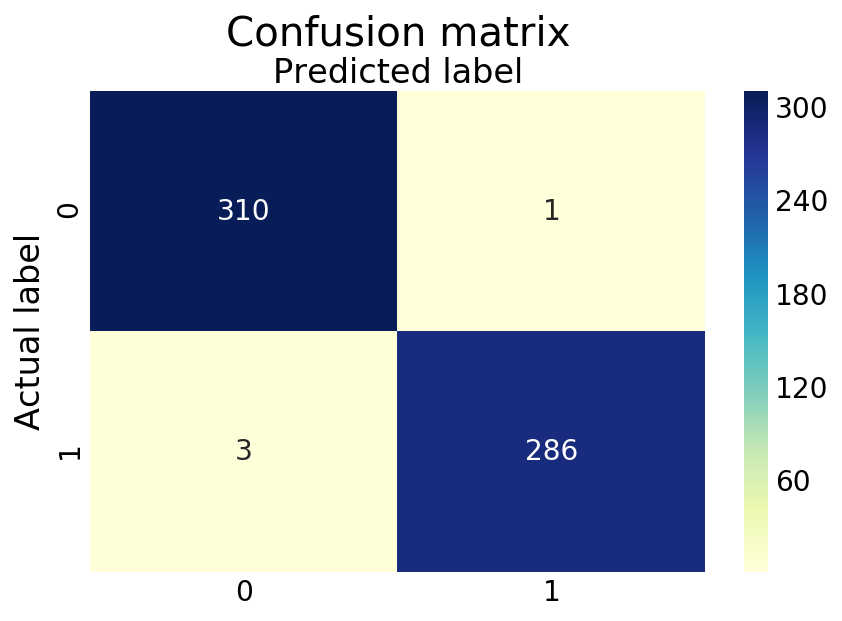

In [17]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [18]:
from sklearn.metrics import classification_report

In [19]:
print(classification_report(y_test,predictions, digits=3))

              precision    recall  f1-score   support

           0      0.990     0.997     0.994       311
           1      0.997     0.990     0.993       289

   micro avg      0.993     0.993     0.993       600
   macro avg      0.993     0.993     0.993       600
weighted avg      0.993     0.993     0.993       600



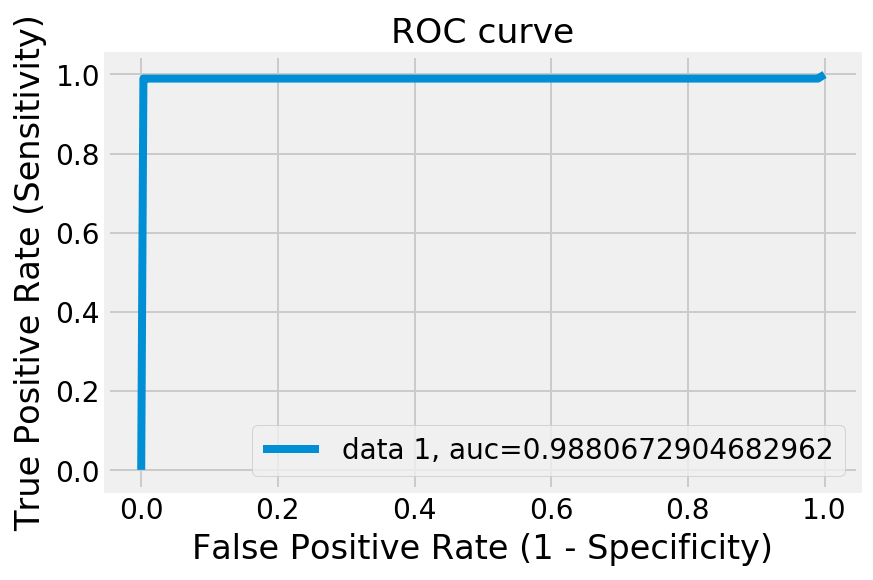

In [20]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions_original)
auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate,true_positive_rate,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()
# reference: https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

## Explainer Eli

In [21]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X.columns.values)

Weight,Feature
1.9413 ± 0.2783,values


## Explainer Shap

In [22]:
import shap
# load JS visualization code to notebook
shap.initjs()

In [23]:
data = X.sample(n=500)

In [24]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(data)
print('Expected Value:', explainer.expected_value)
pd.DataFrame(shap_values).head()

Expected Value: 0.5078571428571429


,0
0,-0.507857
1,-0.507857
2,-0.507857
3,-0.507857
4,0.492143


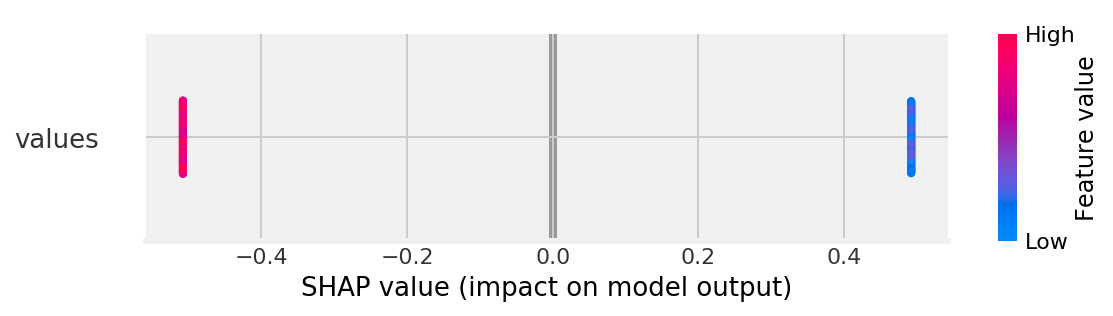

In [25]:
shap.summary_plot(shap_values, data)

In [26]:
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
i=3
shap.force_plot(explainer.expected_value, shap_values[i,:], data.iloc[i])

In [27]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, data)

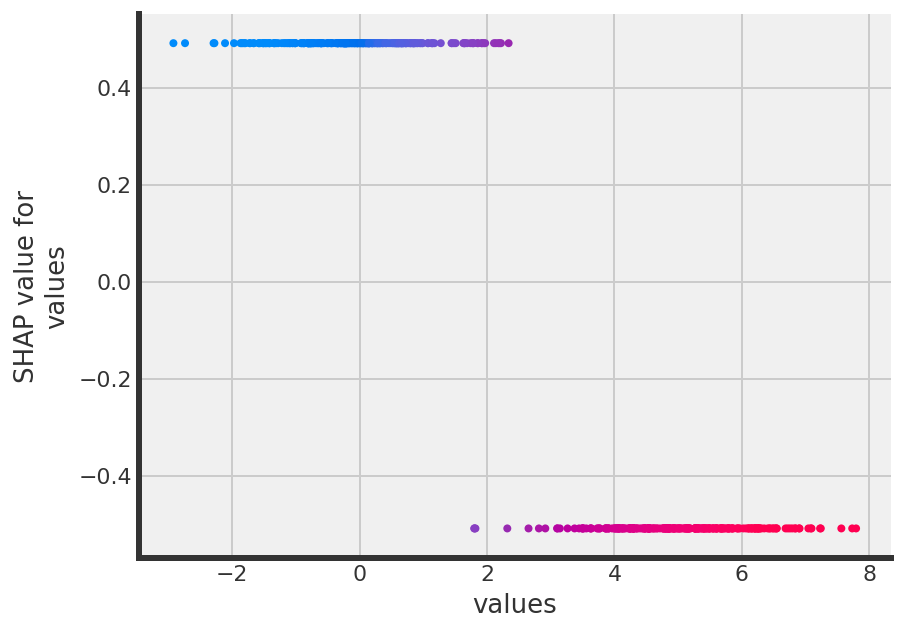

In [28]:
shap.dependence_plot("values", shap_values, data)